This notebook provides you a template to solve Problem 01 of Assignment 05 for DH607. While starter code is provided, you are expected to fill in the details across different code blocks indicated by "INSERT YOUR CODE HERE" --> these could be multiple lines of code.

**In your final submission include a link to this notebook. Please ensure you make your notebooks available for viewing before sharing the link. To evaulate, we will run your notebooks so please ensure that "Runtime -> Restart session and run all" when invoked on your notebook runs without errors. If your notebook is not accessible, we will not be able to evaulate it**.

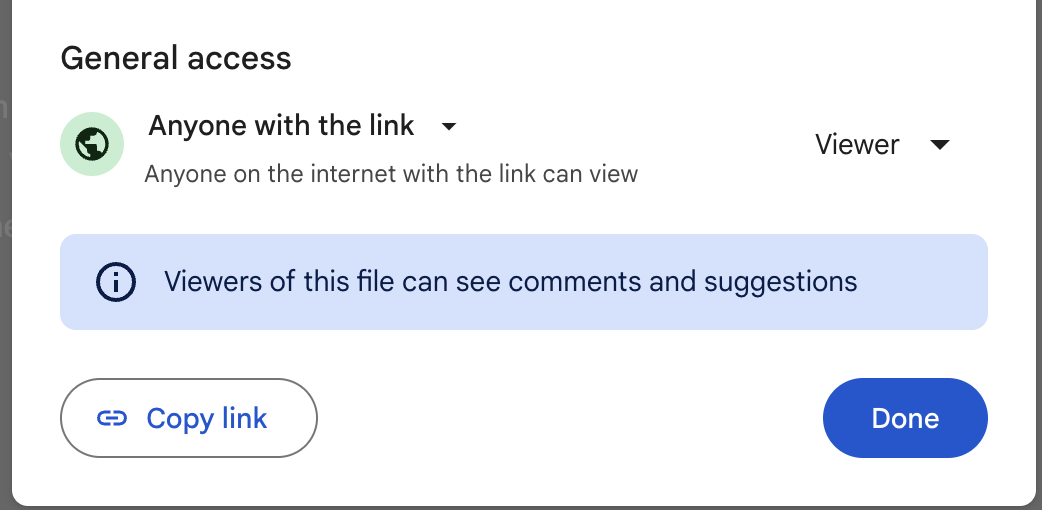

# EM algorithm

Recall the expectation maximization algorithm we discussed in class to assign reads to isoforms of a gene. In the following figure taken from [Pachter 2011](https://arxiv.org/pdf/1104.3889), there are three equal length isoforms (red, blue, and green). We begin with a intial abundance estimate for transcript abundance $\alpha$ and iteratively updated using the expectation (E) and maximization (M) step.

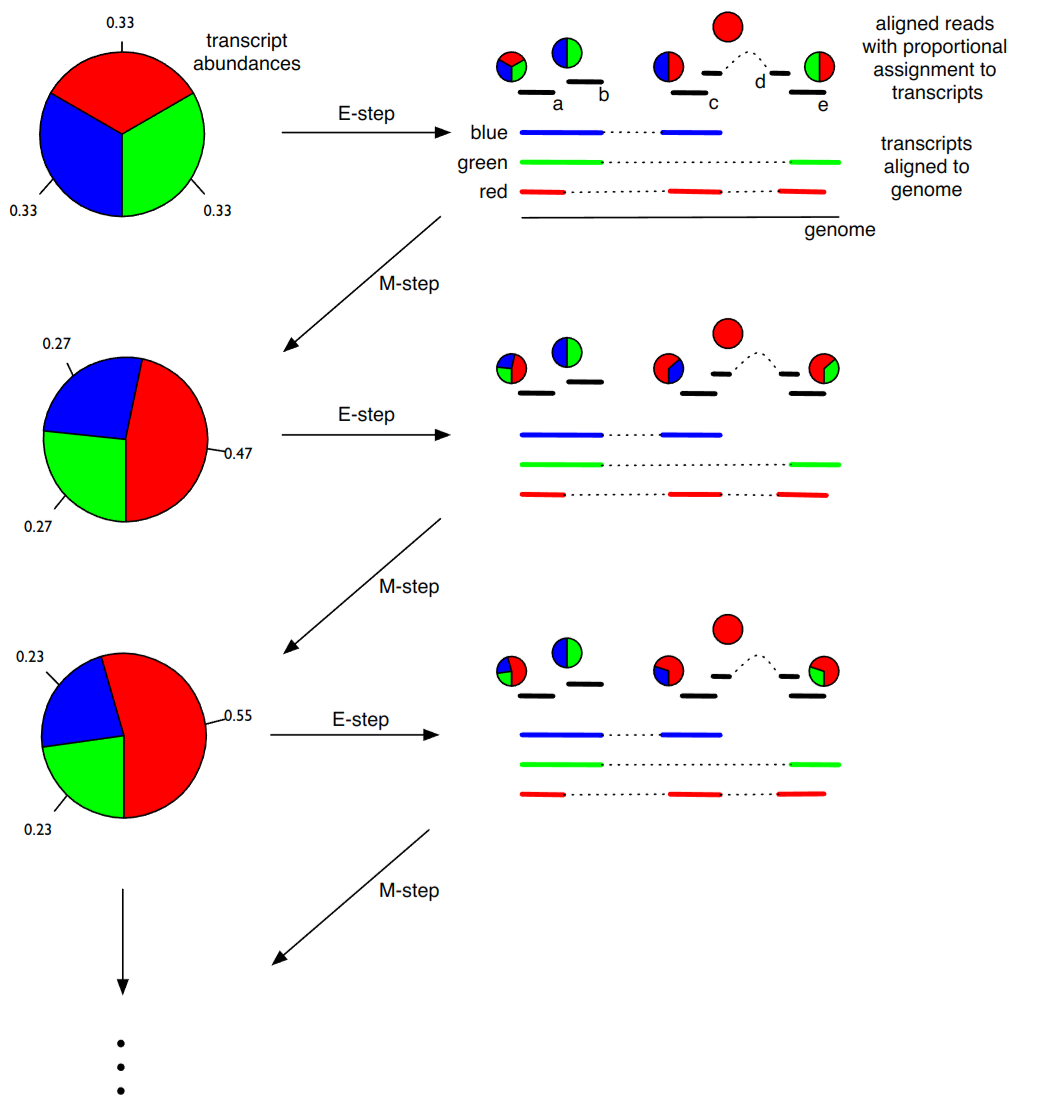

Let transcript abundance estimates be represented by $\alpha$ ($\alpha_{blue}$, $\alpha_{green}$, $\alpha_{red}$). Assume that initially, $\alpha_{blue} = \alpha_{green} = \alpha_{red} = 0.33$



## 1a) Implement the expectation (E) step [10 points]

In E step, we calculate the probabilty of each read $Z_n$ belonging to a transcript class $k$ utilizing the number of reads $y_{k,n}$ assigned to the $k^{th}$ transcript.\\

\begin{align}
p(Z_n=k|Y_n;\alpha^{(t)}) = \frac{  y_{k,n} \alpha^{(t)}_{k}}{ \sum_{l=1}^K y_{l,n} \alpha^{(t)}_{l}}\end{align}




In [1]:
import numpy as np
import pandas as pd

# read to isoform assignment matrix
# DO NOT DELTE
assignment_matrix = np.array([[1,0,1,1,1],[1,1,0,0,1],[1, 1, 1 ,0 ,0]])
# NOT USED
labelled_matrix = pd.DataFrame(assignment_matrix, index=['red','green','blue'], columns=['a','b','c','d','e'])

print(assignment_matrix)
print(labelled_matrix)

[[1 0 1 1 1]
 [1 1 0 0 1]
 [1 1 1 0 0]]
       a  b  c  d  e
red    1  0  1  1  1
green  1  1  0  0  1
blue   1  1  1  0  0


In [2]:
initial_abundance_vector = np.array([0.33,0.33,0.33]) ## DO NOT DELETE

In [3]:
def e_step(transcript_abundance_vector, assignment_matrix):
    """
    Given transcript abundance vector and assignment matrix,
    return the posterior estimates for each read.

    Input:
    transcript_abundance_vector: A vector of (initial) transcript estimates
    assignment_matrix: A matrix of read-to-transcript assignment

    Output:
    posterior: A matrix of posterior estimates for each read
    """
    # Number of transcripts and reads
    num_transcripts, num_reads = assignment_matrix.shape

    # Initialize posterior probability matrix
    posterior = np.zeros((num_transcripts, num_reads))

    # Loop through each read (column in the assignment matrix)
    for read_idx in range(num_reads):
        # Calculate the denominator for normalizing the posterior probabilities
        denominator = np.sum(assignment_matrix[:, read_idx] * transcript_abundance_vector)

        # Calculate posterior probabilities for each transcript
        for transcript_idx in range(num_transcripts):
            if assignment_matrix[transcript_idx, read_idx] == 1:
                posterior[transcript_idx, read_idx] = (
                    assignment_matrix[transcript_idx, read_idx] * transcript_abundance_vector[transcript_idx]
                ) / denominator

    return posterior

In [4]:
round1_E_estimates = e_step(initial_abundance_vector, assignment_matrix) ## DO NOT DELETE
round1_E_estimates ## DO NOT DELETE

array([[0.33333333, 0.        , 0.5       , 1.        , 0.5       ],
       [0.33333333, 0.5       , 0.        , 0.        , 0.5       ],
       [0.33333333, 0.5       , 0.5       , 0.        , 0.        ]])

## 1b) Implement the maximization (M) step [10 points]

In the maximiaztion calculate, we re-estimate the values for $\alpha$, given the posterior values and the previous round $\alpha^{(t)}$ values.

\begin{align}
 \alpha_k^{(t+1)}= \frac{1}{N}\sum_{n=1}^N  \frac{ y_{k,n} \alpha^{(t)}_{k}}{\sum_{l=1}^K  y_{l,n} \alpha^{(t)}_{l}} \quad.
\end{align}

In [5]:
def m_step(posterior, assignment_matrix):
    """
    Given posterior estimates and assignment matrix,
    return the new transcript abundance estimates.

    Input:
    posterior: A matrix of posterior estimates for each read
    assignment_matrix: A matrix of read-to-transcript assignment

    Output:
    new_transcript_abundance: A vector of new transcript estimates
    """
    # Number of reads
    num_reads = assignment_matrix.shape[1]

    # Calculate the new transcript abundance estimates
    new_transcript_abundance = np.sum(posterior, axis=1) / num_reads

    return new_transcript_abundance

In [6]:
round1_M_estimates = m_step(round1_E_estimates, assignment_matrix) ## DO NOT DELETE
round1_M_estimates ## DO NOT DELETE

array([0.46666667, 0.26666667, 0.26666667])


## 1c) Run the EM algorithm till convergence [10 points]

Produce the final estimates for $\alpha_{red}, \alpha_{blue}, \alpha_{green}$. You can terminate execution when the successive $\alpha$ estimates are within 0.0001 of the previous step M step estimates

In [7]:
def run_em_algorithm(assignment_matrix, initial_abundance_vector, tol=0.0001, max_iter=1000):
    current_abundance = initial_abundance_vector
    for iteration in range(max_iter):
        # E-step: Calculate posterior estimates
        posterior = e_step(current_abundance, assignment_matrix)

        # M-step: Update transcript abundance estimates
        new_abundance = m_step(posterior, assignment_matrix)

        # Check for convergence
        if np.all(np.abs(new_abundance - current_abundance) < tol):
            break

        # Update current abundance for the next iteration
        current_abundance = new_abundance

    return new_abundance

# Run the EM algorithm until convergence
new_alpha = run_em_algorithm(assignment_matrix, initial_abundance_vector)

In [8]:
new_alpha ## PRINT FINAL ESTIMATES OF ALPHA

array([0.64029637, 0.17985181, 0.17985181])